In [95]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
import os.path as osp
from main import segment_fish
from utils.compute_iou import compute_ious

In [96]:
data_root = osp.join("dataset", "train", "imgs")
img_paths = glob.glob(osp.join(data_root, "*.jpg"))

In [97]:
imgs_bgr = [cv2.imread(img) for img  in img_paths]

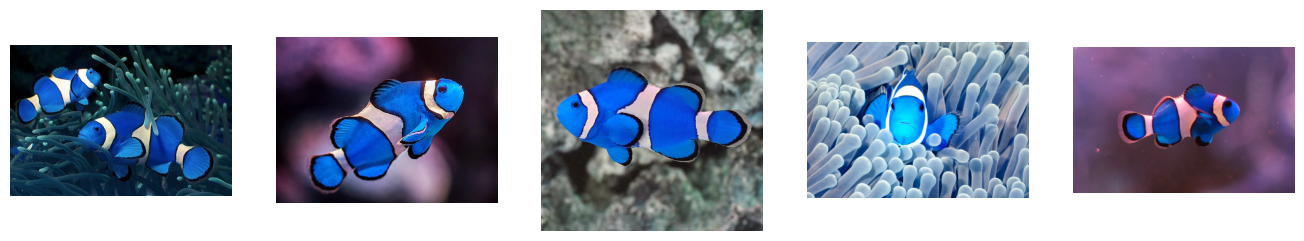

In [98]:
plt.figure(figsize=(20, 20))

for i, img in enumerate(imgs_bgr):
    plt.subplot(1, 6, i+1)
    plt.axis('off')
    plt.imshow(img)

plt.show()

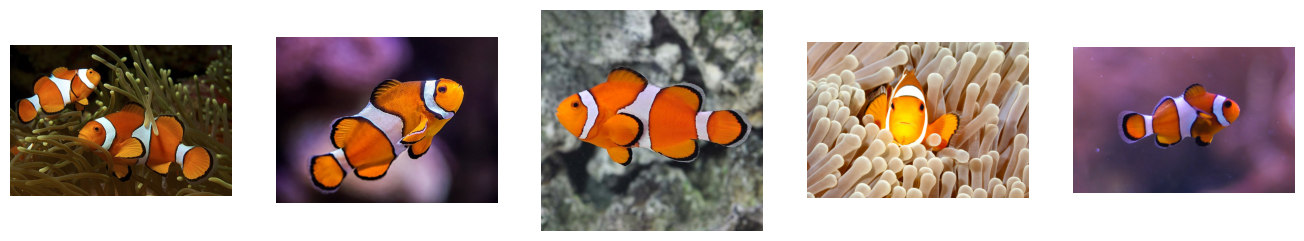

In [99]:
imgs_rgb = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img  in imgs_bgr]

plt.figure(figsize=(20, 20))

for i, img in enumerate(imgs_rgb):
    plt.subplot(1, 6, i+1)
    plt.axis('off')
    plt.imshow(img)

plt.show()

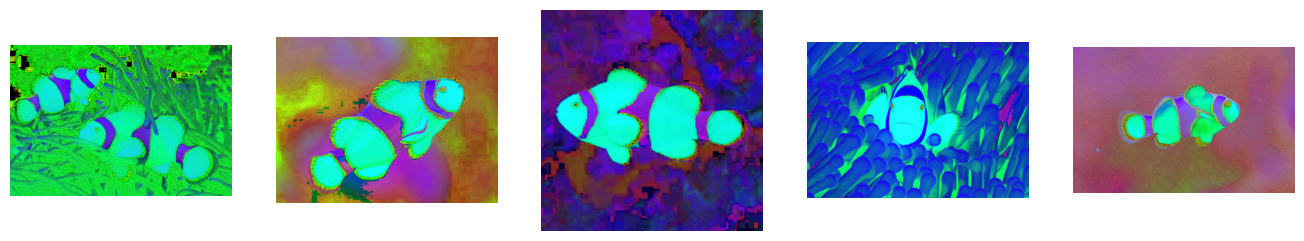

In [100]:
imgs_hsv = [cv2.cvtColor(img, cv2.COLOR_RGB2HSV) for img  in imgs_rgb]

plt.figure(figsize=(20, 20))

for i, img in enumerate(imgs_hsv):
    plt.subplot(1, 6, i+1)
    plt.axis('off')
    plt.imshow(img)

plt.show()

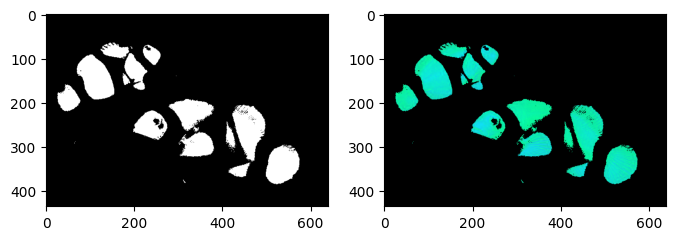

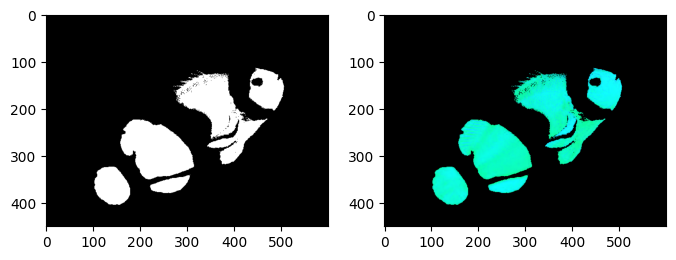

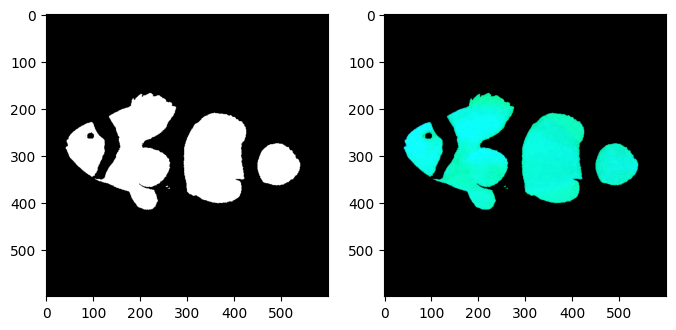

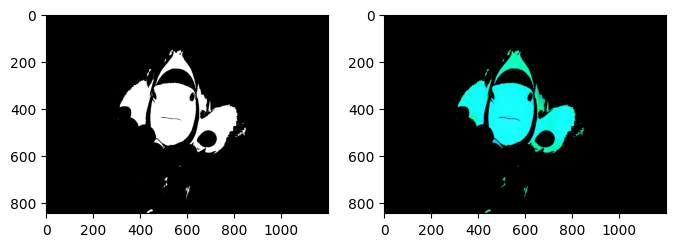

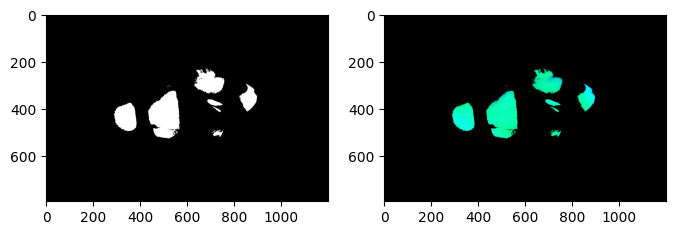

In [101]:
light_orange = (1, 190, 150)
dark_orange = (30, 255, 255)

for i, img in enumerate(imgs_hsv):
  mask_orange = cv2.inRange(img, light_orange, dark_orange)
  result_orange = cv2.bitwise_and(img, img, mask=mask_orange)

  plt.figure(figsize=(8, 8))
  plt.subplot(1, 2, 1)
  plt.imshow(mask_orange, cmap="gray")
  plt.subplot(1, 2, 2)
  plt.imshow(result_orange)
  plt.show()

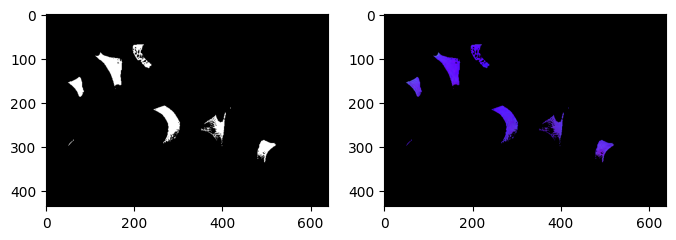

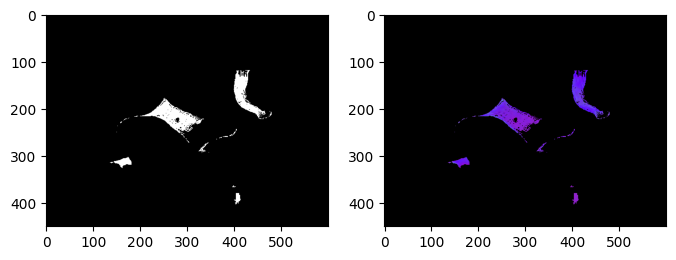

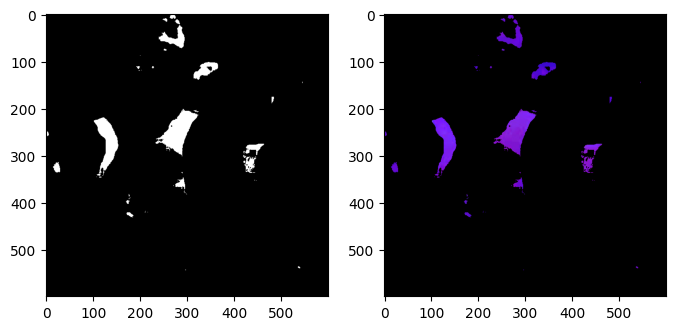

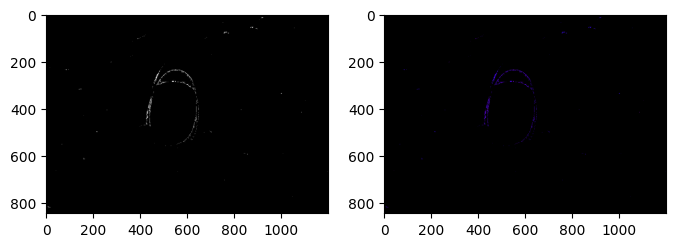

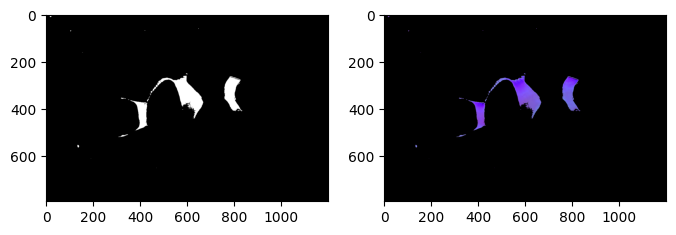

In [102]:
light_white = (60, 0, 200)
dark_white = (145, 150, 255)

for i, img in enumerate(imgs_hsv):
  mask_white = cv2.inRange(img, light_white, dark_white)
  result_white = cv2.bitwise_and(img, img, mask=mask_white)

  plt.figure(figsize=(8, 8))
  plt.subplot(1, 2, 1)
  plt.imshow(mask_white, cmap="gray")
  plt.subplot(1, 2, 2)
  plt.imshow(result_white)
  plt.show()

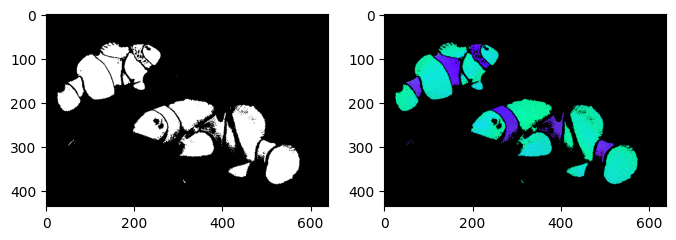

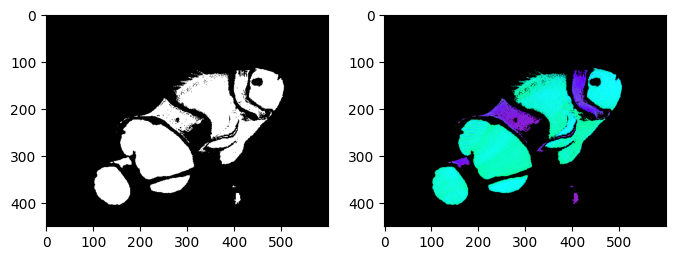

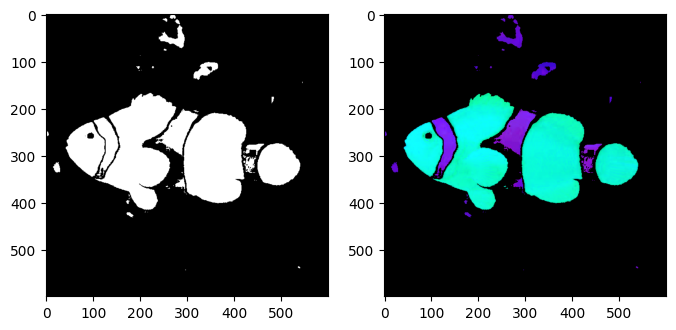

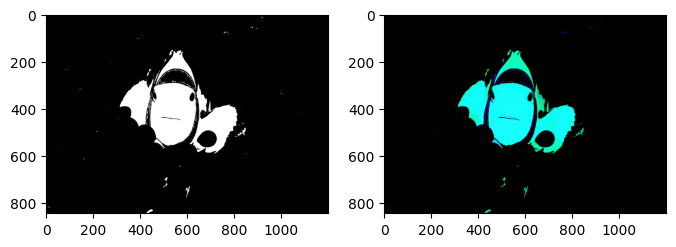

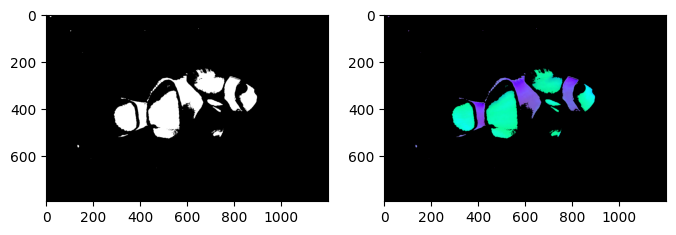

In [103]:
for i, img in enumerate(imgs_hsv):
  mask_orange = cv2.inRange(img, light_orange, dark_orange)
  mask_white = cv2.inRange(img, light_white, dark_white)

  mask_final = mask_orange + mask_white
  result_final = cv2.bitwise_and(img, img, mask=mask_final)

  plt.figure(figsize=(8, 8))
  plt.subplot(1, 2, 1)
  plt.imshow(mask_final, cmap="gray")
  plt.subplot(1, 2, 2)
  plt.imshow(result_final)
  plt.show()

(436, 640, 3) 0.5760528137145291


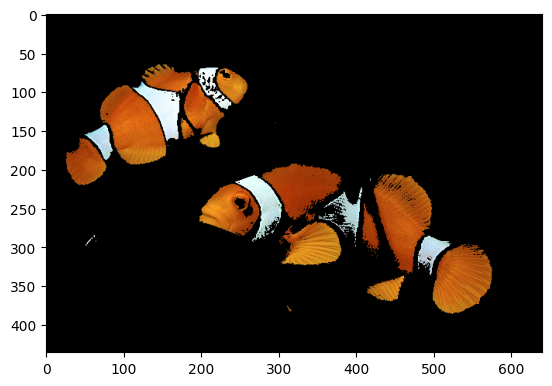

(450, 600, 3) 0.6116046109493144


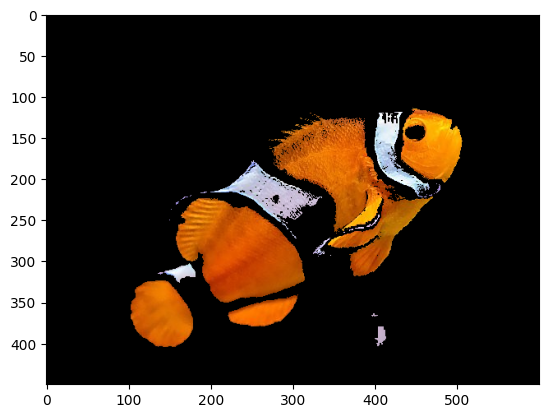

(600, 600, 3) 0.6590357722312045


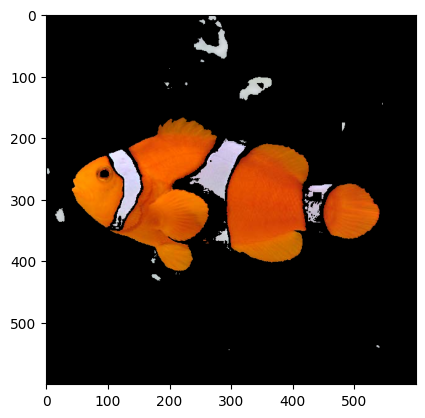

(845, 1200, 3) 0.6727758106525172


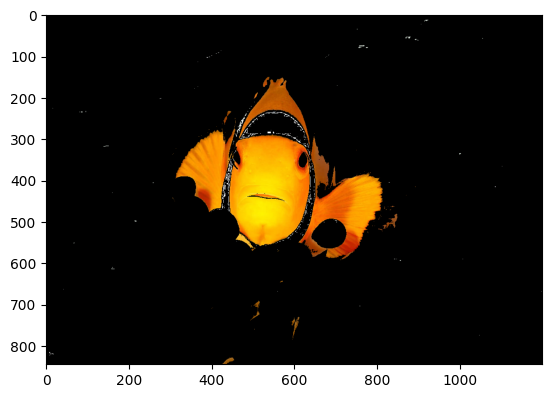

(793, 1200, 3) 0.6411115001860417


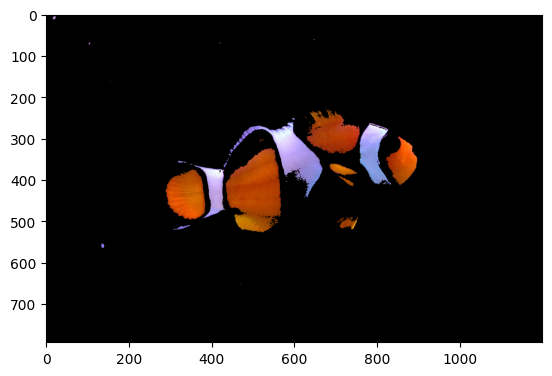

In [104]:
masks = dict()

for path in img_paths:
    img = cv2.imread(path)
    mask = segment_fish(img)
    masks[osp.basename(path)] = mask
    print(mask.shape, compute_ious(masks, osp.join("dataset", "train", "masks")))
    img = np.where(mask[:,:,:], img, np.zeros_like(img))
    plt.imshow(img[:,:,::-1])
    plt.show()